In [1]:
filename = 'weekly-tag-statistic_20.txt'

In [2]:
def read(filename):
    handle = open(filename)
    header = handle.readline().strip().split('\t')
    data = []
    header
    for line in handle:
        data.append([a for a in line.split('\t') if a != '\n'])
    return header, data

In [3]:
def get_data_indexes_of_tags(all_data):
    data_indexes = {}
    for i in range(len(all_data)):
        data_indexes[all_data[i][0]] = i
    return data_indexes

In [4]:
header, stat = read(filename)

In [6]:
indexes_of_tags = get_data_indexes_of_tags(stat)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

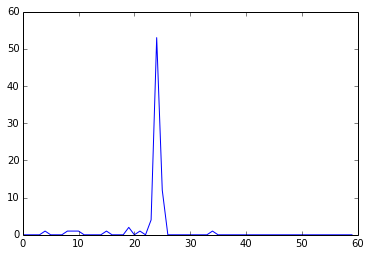

In [8]:
k = 0
plt.plot(stat[k][1:])
plt.xlabel(stat[k][0])
ss = stat[k][1:]

In [9]:
to_int = lambda x: list(map(int, x))

In [12]:
stat_rows_only = []
tag_names = []
for row in stat:
    stat_rows_only.append(to_int(row[1:]))
    tag_names.append(row[0])

In [14]:
def argmax(row):
    max_ = max(row)
    argmaxes = [i for i in range(len(row)) if row[i] == max_]
    return int(sum(argmaxes) / len(argmaxes))

In [15]:
def get_waves(row):
    waves = []
    mean_interest_level = sum(row) / len(row)
    #print('mean int level {0}'.format(mean_interest_level))
    opened = False
    for i in range(len(row)):
        if row[i] >= mean_interest_level:
            #print('{0} > {1}'.format(row[i], mean_interest_level))
            if not opened:
                opened = True
                start = i - 1
                if start < 0:
                    start = 0
        if row[i] < mean_interest_level:
            if opened:
                opened = False
                if start < i:
                    argmax_ = start + argmax(row[start:i+1])
                    if argmax_ > start:
                        waves.append((start, i, argmax_),)
    return waves

In [16]:
def to_tan_n_width(jumps, row):
    a = []
    #print(jumps)
    for left, right, argmax_ in jumps:
        max_ = row[argmax_]
        vert = max_ - row[left]
        hor = argmax_ - left
        tan = vert / hor
        width = right - left
        a.append((tan, width),)
    return a

In [17]:
def get_tan_n_width(row):
    return to_tan_n_width(get_waves(row), row)

In [20]:
all_waves = []
for stat_row in stat_rows_only:
    all_waves.extend(get_waves(stat_row))

In [29]:
wave_per_date_count = {}
for left, right, center in all_waves:
    i = left
    while i <= right:
        if not i in wave_per_date_count:
            wave_per_date_count[i] = 1
        else:
            wave_per_date_count[i] += 1
        i += 1

In [33]:
wave_per_date_count_list = [0] * len(stat_rows_only[0])
for date in wave_per_date_count:
    wave_per_date_count_list[date] = wave_per_date_count[date]

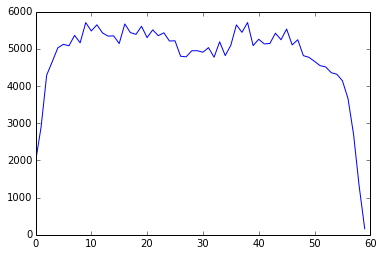

In [35]:
plt.plot(wave_per_date_count_list)